In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

# ARMA

### Read the data

In [3]:
data = pd.read_csv('Index2018.csv',index_col='date',parse_dates=True, dayfirst=True)
data.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [4]:
data.tail()

,spx,dax,ftse,nikkei
date,,,,
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49
2018-01-26,2872.867839,13340.17,7665.541292,23631.88
2018-01-29,2853.528411,13324.48,7671.533300,23629.34


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6269 entries, 1994-01-07 to 2018-01-29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   spx     6269 non-null   float64
 1   dax     6269 non-null   float64
 2   ftse    6269 non-null   float64
 3   nikkei  6269 non-null   float64
dtypes: float64(4)
memory usage: 244.9 KB


In [6]:
ftse = pd.DataFrame(data['ftse'])
ftse.head()

,ftse
date,
1994-01-07,3445.98
1994-01-10,3440.58
1994-01-11,3413.77
1994-01-12,3372.02
1994-01-13,3360.01


In [7]:
ftse.index

DatetimeIndex(['1994-01-07', '1994-01-10', '1994-01-11', '1994-01-12',
               '1994-01-13', '1994-01-14', '1994-01-17', '1994-01-18',
               '1994-01-19', '1994-01-20',
               ...
               '2018-01-16', '2018-01-17', '2018-01-18', '2018-01-19',
               '2018-01-22', '2018-01-23', '2018-01-24', '2018-01-25',
               '2018-01-26', '2018-01-29'],
              dtype='datetime64[ns]', name='date', length=6269, freq=None)

In [8]:
ftse = ftse.asfreq('b')

In [9]:
ftse.index

DatetimeIndex(['1994-01-07', '1994-01-10', '1994-01-11', '1994-01-12',
               '1994-01-13', '1994-01-14', '1994-01-17', '1994-01-18',
               '1994-01-19', '1994-01-20',
               ...
               '2018-01-16', '2018-01-17', '2018-01-18', '2018-01-19',
               '2018-01-22', '2018-01-23', '2018-01-24', '2018-01-25',
               '2018-01-26', '2018-01-29'],
              dtype='datetime64[ns]', name='date', length=6277, freq='B')

In [10]:
ftse.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6277 entries, 1994-01-07 to 2018-01-29
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ftse    6269 non-null   float64
dtypes: float64(1)
memory usage: 98.1 KB


In [11]:
ftse = ftse.fillna(method='ffill')

In [12]:
ftse['returns'] = ftse.pct_change(periods=1)*100
ftse.head()

,ftse,returns
date,,
1994-01-07,3445.98,NaN
1994-01-10,3440.58,-0.156704
1994-01-11,3413.77,-0.779229
1994-01-12,3372.02,-1.222988
1994-01-13,3360.01,-0.356166


In [13]:
ftse.dropna(inplace=True)

### Visualize the data

In [14]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

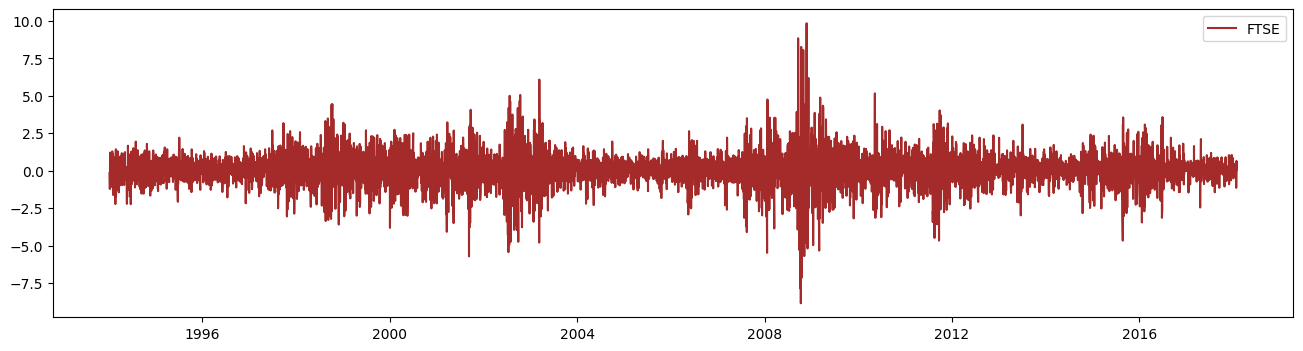

In [15]:
plt.figure(figsize=(16,4))
plt.plot(ftse['returns'], label='FTSE',color='brown')
plt.legend()
plt.show()

### ETS Decomposition

In [16]:
ftse.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6276 entries, 1994-01-10 to 2018-01-29
Freq: B
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ftse     6276 non-null   float64
 1   returns  6276 non-null   float64
dtypes: float64(2)
memory usage: 147.1 KB


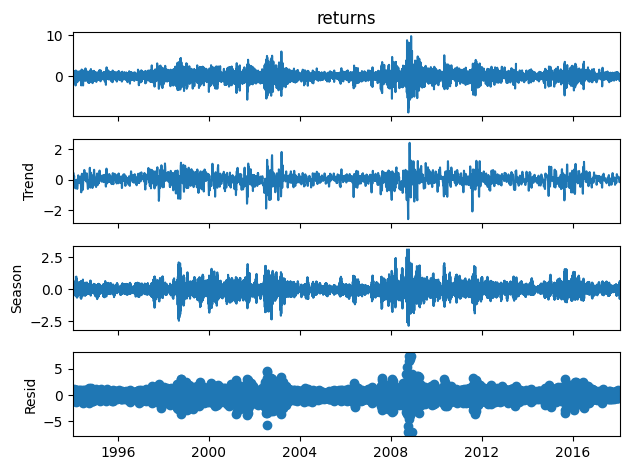

In [17]:
res = STL(ftse['returns']).fit()
res.plot()
plt.show()

### Augmented Dickey Fuller Test for Stationarity

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
def adf_test(data):
    ## H0: Data is not Stationary
    ## H1: Data is Stationary
    if adfuller(data)[1] > 0.05:
        print("Failed to reject the null hypothesis")
        print('Data is Not stationary')
    else:
        print("Reject the null hypothesis")
        print("Data is stationary")

In [20]:
adf_test(ftse['returns'])

Reject the null hypothesis
Data is stationary


### Find the order of AR and MA

### a. Use ACF and PACF plots

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

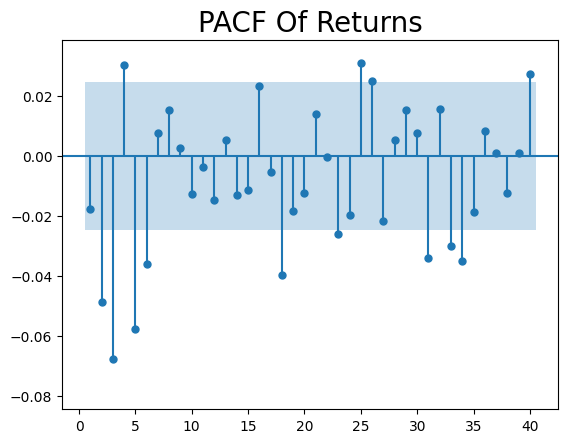

In [22]:
plot_pacf(ftse['returns'], lags=40, zero=False, auto_ylims=True)
plt.title("PACF Of Returns",size=20)
plt.show()

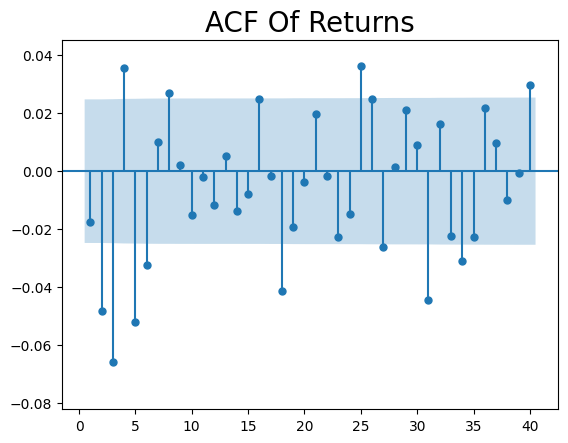

In [23]:
plot_acf(ftse['returns'], lags=40, zero=False, auto_ylims=True)
plt.title("ACF Of Returns",size=20)
plt.show()

### b. Use pmdarima

In [24]:
#!pip install pmdarima

In [25]:
from pmdarima import auto_arima

In [26]:
auto_model = auto_arima(ftse['returns'], start_p=0, start_q=0, max_p=8, max_q=8, trace=True, seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19201.167, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=19201.289, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=19201.083, Time=0.40 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=19173.711, Time=0.66 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=19169.096, Time=0.70 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=19188.689, Time=0.37 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=19152.428, Time=0.96 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=19162.276, Time=0.43 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=19154.085, Time=1.08 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=19151.919, Time=1.85 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=19175.705, Time=1.19 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=19148.756, Time=1.72 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=19133.084, Time=2.74 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=19136.618, Time=1.78 sec
 ARIMA(6,0,2)(0,0,0

In [27]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6276
Model:               SARIMAX(5, 0, 2)   Log Likelihood               -9557.256
Date:                Fri, 19 Jan 2024   AIC                          19132.511
Time:                        18:01:10   BIC                          19193.212
Sample:                    01-10-1994   HQIC                         19153.543
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0221      0.015      1.475      0.140      -0.007       0.052
ar.L1          0.3777      0.079      4.757      0.000       0.222       0.533
ar.L2         -0.4218      0.085     -4.941      0.000      -0.589      -0.254
ar.L3         -0.0589      0.010     -6.154      0.000      -0.078      -0.040
ar.L4          0.0375      0.009      4.176      0.000       0.020       0.055
ar.L5         -0.0959      0.008    -11.972      0.000      -0.112      -0.080
ma.L1         -0.3975      0.080     -4.995      0.000      -0.553      -0.242
ma.L2          0.3797      0.087      4.372      0.000       0.210       0.550
sigma2         1.2309      0.012    105.097      0.000       1.208       1.254
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8767.43
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Build the ARMA model

#### Split the data into train and test

In [28]:
train_len = int(len(ftse)*.75)
test_len = int(len(ftse)*.25)
train_len,test_len

(4707, 1569)

In [29]:
train_data = ftse.iloc[:train_len]
test_data = ftse.iloc[train_len:]

In [30]:
from statsmodels.tsa.arima.model import ARIMA

In [31]:
final_model = ARIMA(train_data['returns'], order=(5,0,2))
fitted_model = final_model.fit(method_kwargs={'maxiter':300})

In [32]:
ts_predicted = fitted_model.predict(start=train_len, end=train_len+test_len-1)

In [33]:
test_data['predictions'] = ts_predicted
test_data.head()

,ftse,returns,predictions
date,,,
2012-01-25,5723.00,-0.502443,0.026827
2012-01-26,5795.20,1.261576,-0.066635
2012-01-27,5733.45,-1.065537,0.086954
2012-01-30,5671.09,-1.087652,0.033137
2012-01-31,5681.61,0.185502,-0.017894


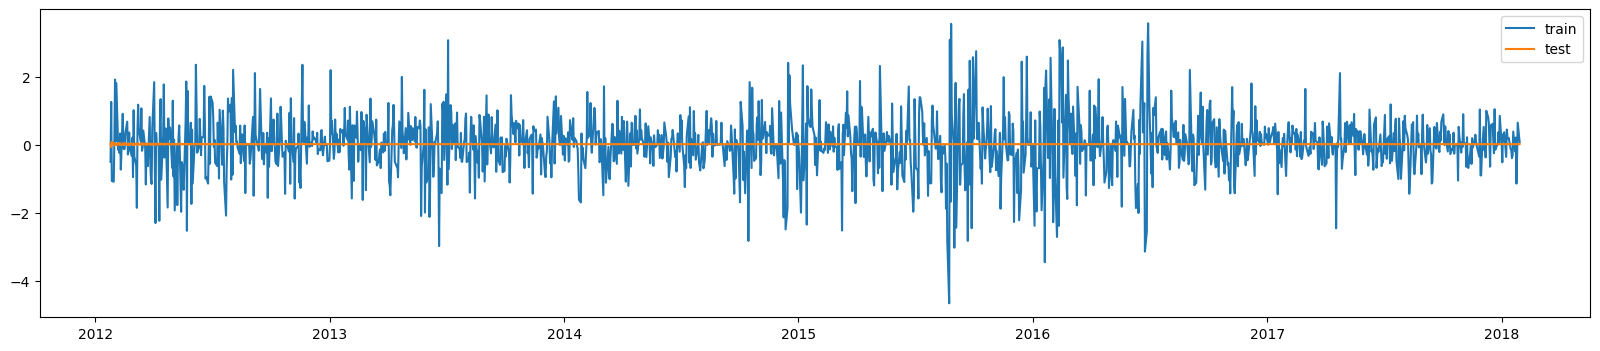

In [34]:
plt.figure(figsize=(20,4))
plt.plot(test_data['returns'],label='train')
plt.plot(ts_predicted, label='test')
plt.legend()
plt.show()

### Get the metrics

In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
ts_mse = mean_squared_error(test_data['returns'], ts_predicted)
ts_rmse = np.sqrt(ts_mse)
ts_mse, ts_rmse

(0.7134879963170764, 0.8446821865749723)

### Examine the residuals

In [37]:
residuals = fitted_model.resid

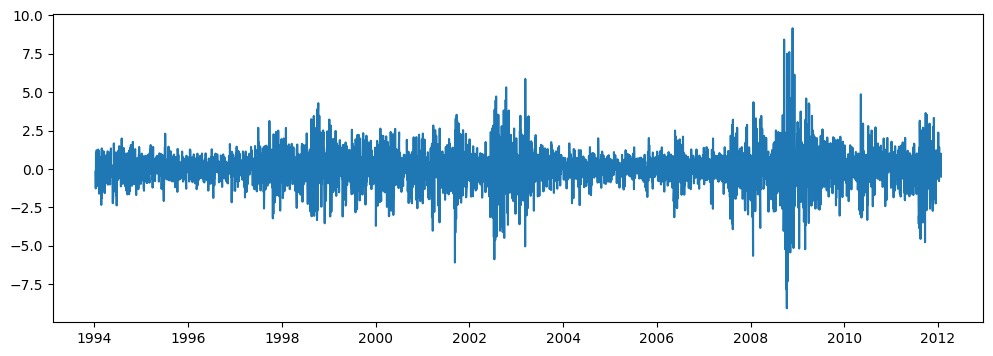

In [38]:
plt.figure(figsize=(12,4))
plt.plot(residuals)
plt.show()

In [39]:
residuals.mean()

-6.138328640275445e-05

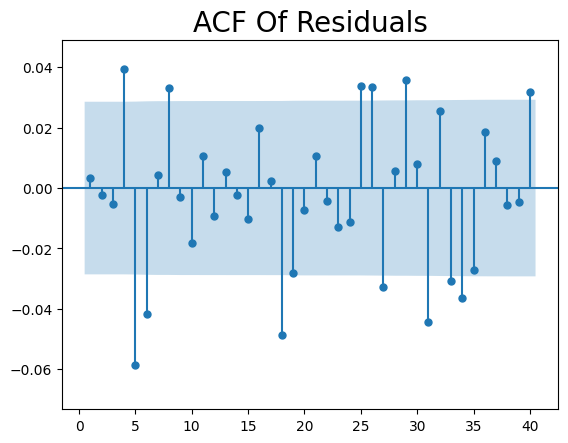

In [40]:
plot_acf(residuals, lags=40, zero=False, auto_ylims=True)
plt.title("ACF Of Residuals",size=20)
plt.show()

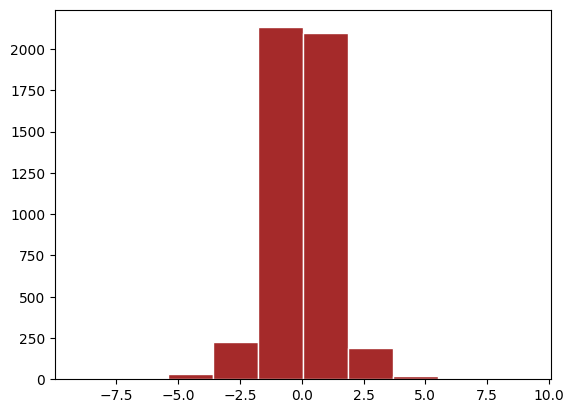

In [41]:
plt.hist(residuals, color='brown', edgecolor='w')
plt.show()

### Rebuild the model with full data 

In [42]:
full_model = ARIMA(ftse['returns'], order=(5,0,2),).fit(method_kwargs={'maxiter':300})

In [43]:
forecast = full_model.predict(start=len(ftse), end=len(ftse)+test_len)
forecast

2018-01-30   -0.025154
2018-01-31    0.027402
2018-02-01    0.097576
2018-02-02   -0.010782
2018-02-05   -0.033199
                ...   
2024-01-30    0.019019
2024-01-31    0.019019
2024-02-01    0.019019
2024-02-02    0.019019
2024-02-05    0.019019
Freq: B, Name: predicted_mean, Length: 1570, dtype: float64